In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
draw_landmarks(frame, results)

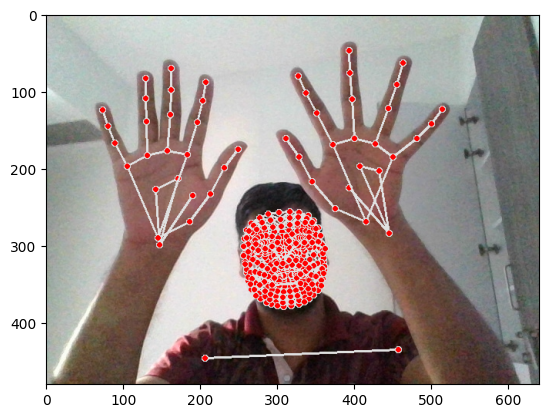

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [16]:
len(results.right_hand_landmarks.landmark)

21

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
np.save('0', result_test)

# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks','nice'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30


In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# 5. Collect Keypoint Values for Training and Testing

In [46]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
               # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [1]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

# Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'nice': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
X = np.array(sequences)

In [32]:
y = utils.to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [37]:
res = [.7, 0.2, 0.1]

In [38]:
actions[np.argmax(res)]

'hello'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 3s 59ms/step - loss: 1.2299 - categorical_accuracy: 0.2500
Epoch 2/1000
3/3 [==============================] - 0s 63ms/step - loss: 3.2557 - categorical_accuracy: 0.3194
Epoch 3/1000
3/3 [==============================] - 0s 65ms/step - loss: 1.4428 - categorical_accuracy: 0.3472
Epoch 4/1000
3/3 [==============================] - 0s 57ms/step - loss: 1.3886 - categorical_accuracy: 0.1944
Epoch 5/1000
3/3 [==============================] - 0s 57ms/step - loss: 4.1754 - categorical_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 63ms/step - loss: 2.0555 - categorical_accuracy: 0.3472
Epoch 7/1000
3/3 [==============================] - 0s 59ms/step - loss: 1.1127 - categorical_accuracy: 0.3472
Epoch 8/1000
3/3 [==============================] - 0s 66ms/step - loss: 1.0896 - categorical_accuracy: 0.3194
Epoch 9/1000
3/3 [==============================] - 0s 61ms/step - loss: 1.0929 - categorical_accuracy: 0.4167
E

3/3 [==============================] - 0s 60ms/step - loss: 0.0976 - categorical_accuracy: 0.9861
Epoch 75/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.0770 - categorical_accuracy: 0.9861
Epoch 76/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0467 - categorical_accuracy: 0.9861
Epoch 77/1000
3/3 [==============================] - 0s 54ms/step - loss: 0.0447 - categorical_accuracy: 0.9861
Epoch 78/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0258 - categorical_accuracy: 0.9861
Epoch 79/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.0606 - categorical_accuracy: 0.9722
Epoch 80/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0568 - categorical_accuracy: 0.9722
Epoch 81/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0250 - categorical_accuracy: 0.9861
Epoch 82/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.0274 - categorical_accuracy: 0.9861
Epoch 

3/3 [==============================] - 0s 62ms/step - loss: 0.1691 - categorical_accuracy: 0.9444
Epoch 147/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.2763 - categorical_accuracy: 0.9028
Epoch 148/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.2667 - categorical_accuracy: 0.9583
Epoch 149/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.2010 - categorical_accuracy: 0.9583
Epoch 150/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.1079 - categorical_accuracy: 0.9861
Epoch 151/1000
3/3 [==============================] - 0s 57ms/step - loss: 0.0742 - categorical_accuracy: 0.9861
Epoch 152/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0756 - categorical_accuracy: 0.9861
Epoch 153/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0453 - categorical_accuracy: 0.9861
Epoch 154/1000
3/3 [==============================] - 0s 54ms/step - loss: 0.0468 - categorical_accuracy: 0.986

3/3 [==============================] - 0s 61ms/step - loss: 0.0220 - categorical_accuracy: 0.9861
Epoch 219/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0135 - categorical_accuracy: 0.9861
Epoch 220/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 221/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0109 - categorical_accuracy: 0.9861
Epoch 222/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0172 - categorical_accuracy: 0.9861
Epoch 223/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 224/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0084 - categorical_accuracy: 1.0000
Epoch 225/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 226/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0068 - categorical_accuracy: 1.000

Epoch 289/1000
3/3 [==============================] - 0s 62ms/step - loss: 8.5073e-05 - categorical_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 60ms/step - loss: 8.2885e-05 - categorical_accuracy: 1.0000
Epoch 291/1000
3/3 [==============================] - 0s 62ms/step - loss: 8.1279e-05 - categorical_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 62ms/step - loss: 7.9767e-05 - categorical_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 61ms/step - loss: 7.8425e-05 - categorical_accuracy: 1.0000
Epoch 294/1000
3/3 [==============================] - 0s 61ms/step - loss: 7.6825e-05 - categorical_accuracy: 1.0000
Epoch 295/1000
3/3 [==============================] - 0s 61ms/step - loss: 7.5781e-05 - categorical_accuracy: 1.0000
Epoch 296/1000
3/3 [==============================] - 0s 58ms/step - loss: 7.4388e-05 - categorical_accuracy: 1.0000
Epoch 297/1000
3/3 [==============================] - 0s 59ms/st

3/3 [==============================] - 0s 55ms/step - loss: 2.4900e-05 - categorical_accuracy: 1.0000
Epoch 360/1000
3/3 [==============================] - 0s 55ms/step - loss: 2.4717e-05 - categorical_accuracy: 1.0000
Epoch 361/1000
3/3 [==============================] - 0s 60ms/step - loss: 2.4409e-05 - categorical_accuracy: 1.0000
Epoch 362/1000
3/3 [==============================] - 0s 62ms/step - loss: 2.4194e-05 - categorical_accuracy: 1.0000
Epoch 363/1000
3/3 [==============================] - 0s 52ms/step - loss: 2.3911e-05 - categorical_accuracy: 1.0000
Epoch 364/1000
3/3 [==============================] - 0s 63ms/step - loss: 2.3736e-05 - categorical_accuracy: 1.0000
Epoch 365/1000
3/3 [==============================] - 0s 58ms/step - loss: 2.3333e-05 - categorical_accuracy: 1.0000
Epoch 366/1000
3/3 [==============================] - 0s 57ms/step - loss: 2.3027e-05 - categorical_accuracy: 1.0000
Epoch 367/1000
3/3 [==============================] - 0s 60ms/step - loss: 2.28

3/3 [==============================] - 0s 65ms/step - loss: 1.1314e-05 - categorical_accuracy: 1.0000
Epoch 430/1000
3/3 [==============================] - 0s 63ms/step - loss: 1.1235e-05 - categorical_accuracy: 1.0000
Epoch 431/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.1157e-05 - categorical_accuracy: 1.0000
Epoch 432/1000
3/3 [==============================] - 0s 65ms/step - loss: 1.1069e-05 - categorical_accuracy: 1.0000
Epoch 433/1000
3/3 [==============================] - 0s 66ms/step - loss: 1.0991e-05 - categorical_accuracy: 1.0000
Epoch 434/1000
3/3 [==============================] - 0s 66ms/step - loss: 1.0937e-05 - categorical_accuracy: 1.0000
Epoch 435/1000
3/3 [==============================] - 0s 64ms/step - loss: 1.0862e-05 - categorical_accuracy: 1.0000
Epoch 436/1000
3/3 [==============================] - 0s 63ms/step - loss: 1.0786e-05 - categorical_accuracy: 1.0000
Epoch 437/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.07

3/3 [==============================] - 0s 61ms/step - loss: 6.3912e-06 - categorical_accuracy: 1.0000
Epoch 500/1000
3/3 [==============================] - 0s 60ms/step - loss: 6.3449e-06 - categorical_accuracy: 1.0000
Epoch 501/1000
3/3 [==============================] - 0s 61ms/step - loss: 6.2770e-06 - categorical_accuracy: 1.0000
Epoch 502/1000
3/3 [==============================] - 0s 65ms/step - loss: 6.2291e-06 - categorical_accuracy: 1.0000
Epoch 503/1000
3/3 [==============================] - 0s 57ms/step - loss: 6.1728e-06 - categorical_accuracy: 1.0000
Epoch 504/1000
3/3 [==============================] - 0s 62ms/step - loss: 6.1480e-06 - categorical_accuracy: 1.0000
Epoch 505/1000
3/3 [==============================] - 0s 64ms/step - loss: 6.1082e-06 - categorical_accuracy: 1.0000
Epoch 506/1000
3/3 [==============================] - 0s 63ms/step - loss: 6.0718e-06 - categorical_accuracy: 1.0000
Epoch 507/1000
3/3 [==============================] - 0s 60ms/step - loss: 6.02

3/3 [==============================] - 0s 68ms/step - loss: 4.2214e-06 - categorical_accuracy: 1.0000
Epoch 570/1000
3/3 [==============================] - 0s 62ms/step - loss: 4.1850e-06 - categorical_accuracy: 1.0000
Epoch 571/1000
3/3 [==============================] - 0s 58ms/step - loss: 4.1602e-06 - categorical_accuracy: 1.0000
Epoch 572/1000
3/3 [==============================] - 0s 58ms/step - loss: 4.1403e-06 - categorical_accuracy: 1.0000
Epoch 573/1000
3/3 [==============================] - 0s 61ms/step - loss: 4.1055e-06 - categorical_accuracy: 1.0000
Epoch 574/1000
3/3 [==============================] - 0s 54ms/step - loss: 4.0824e-06 - categorical_accuracy: 1.0000
Epoch 575/1000
3/3 [==============================] - 0s 65ms/step - loss: 4.0675e-06 - categorical_accuracy: 1.0000
Epoch 576/1000
3/3 [==============================] - 0s 58ms/step - loss: 4.0360e-06 - categorical_accuracy: 1.0000
Epoch 577/1000
3/3 [==============================] - 0s 65ms/step - loss: 4.01

3/3 [==============================] - 0s 63ms/step - loss: 2.8988e-06 - categorical_accuracy: 1.0000
Epoch 640/1000
3/3 [==============================] - 0s 62ms/step - loss: 2.8889e-06 - categorical_accuracy: 1.0000
Epoch 641/1000
3/3 [==============================] - 0s 54ms/step - loss: 2.8756e-06 - categorical_accuracy: 1.0000
Epoch 642/1000
3/3 [==============================] - 0s 72ms/step - loss: 2.8574e-06 - categorical_accuracy: 1.0000
Epoch 643/1000
3/3 [==============================] - 0s 62ms/step - loss: 2.8458e-06 - categorical_accuracy: 1.0000
Epoch 644/1000
3/3 [==============================] - 0s 68ms/step - loss: 2.8343e-06 - categorical_accuracy: 1.0000
Epoch 645/1000
3/3 [==============================] - 0s 64ms/step - loss: 2.8194e-06 - categorical_accuracy: 1.0000
Epoch 646/1000
3/3 [==============================] - 0s 65ms/step - loss: 2.8127e-06 - categorical_accuracy: 1.0000
Epoch 647/1000
3/3 [==============================] - 0s 63ms/step - loss: 2.79

3/3 [==============================] - 0s 72ms/step - loss: 2.0794e-06 - categorical_accuracy: 1.0000
Epoch 710/1000
3/3 [==============================] - 0s 57ms/step - loss: 2.0678e-06 - categorical_accuracy: 1.0000
Epoch 711/1000
3/3 [==============================] - 0s 58ms/step - loss: 2.0595e-06 - categorical_accuracy: 1.0000
Epoch 712/1000
3/3 [==============================] - 0s 67ms/step - loss: 2.0496e-06 - categorical_accuracy: 1.0000
Epoch 713/1000
3/3 [==============================] - 0s 62ms/step - loss: 2.0430e-06 - categorical_accuracy: 1.0000
Epoch 714/1000
3/3 [==============================] - 0s 66ms/step - loss: 2.0330e-06 - categorical_accuracy: 1.0000
Epoch 715/1000
3/3 [==============================] - 0s 64ms/step - loss: 2.0181e-06 - categorical_accuracy: 1.0000
Epoch 716/1000
3/3 [==============================] - 0s 71ms/step - loss: 2.0082e-06 - categorical_accuracy: 1.0000
Epoch 717/1000
3/3 [==============================] - 0s 55ms/step - loss: 1.99

3/3 [==============================] - 0s 65ms/step - loss: 1.4900e-06 - categorical_accuracy: 1.0000
Epoch 780/1000
3/3 [==============================] - 0s 62ms/step - loss: 1.4851e-06 - categorical_accuracy: 1.0000
Epoch 781/1000
3/3 [==============================] - 0s 58ms/step - loss: 1.4801e-06 - categorical_accuracy: 1.0000
Epoch 782/1000
3/3 [==============================] - 0s 63ms/step - loss: 1.4751e-06 - categorical_accuracy: 1.0000
Epoch 783/1000
3/3 [==============================] - 0s 67ms/step - loss: 1.4718e-06 - categorical_accuracy: 1.0000
Epoch 784/1000
3/3 [==============================] - 0s 66ms/step - loss: 1.4652e-06 - categorical_accuracy: 1.0000
Epoch 785/1000
3/3 [==============================] - 0s 67ms/step - loss: 1.4602e-06 - categorical_accuracy: 1.0000
Epoch 786/1000
3/3 [==============================] - 0s 64ms/step - loss: 1.4553e-06 - categorical_accuracy: 1.0000
Epoch 787/1000
3/3 [==============================] - 0s 60ms/step - loss: 1.45

3/3 [==============================] - 0s 66ms/step - loss: 1.0795e-06 - categorical_accuracy: 1.0000
Epoch 850/1000
3/3 [==============================] - 0s 63ms/step - loss: 1.0728e-06 - categorical_accuracy: 1.0000
Epoch 851/1000
3/3 [==============================] - 0s 53ms/step - loss: 1.0712e-06 - categorical_accuracy: 1.0000
Epoch 852/1000
3/3 [==============================] - 0s 71ms/step - loss: 1.0646e-06 - categorical_accuracy: 1.0000
Epoch 853/1000
3/3 [==============================] - 0s 61ms/step - loss: 1.0629e-06 - categorical_accuracy: 1.0000
Epoch 854/1000
3/3 [==============================] - 0s 64ms/step - loss: 1.0546e-06 - categorical_accuracy: 1.0000
Epoch 855/1000
3/3 [==============================] - 0s 63ms/step - loss: 1.0546e-06 - categorical_accuracy: 1.0000
Epoch 856/1000
3/3 [==============================] - 0s 57ms/step - loss: 1.0447e-06 - categorical_accuracy: 1.0000
Epoch 857/1000
3/3 [==============================] - 0s 69ms/step - loss: 1.03

3/3 [==============================] - 0s 61ms/step - loss: 8.3444e-07 - categorical_accuracy: 1.0000
Epoch 920/1000
3/3 [==============================] - 0s 57ms/step - loss: 8.2947e-07 - categorical_accuracy: 1.0000
Epoch 921/1000
3/3 [==============================] - 0s 67ms/step - loss: 8.2947e-07 - categorical_accuracy: 1.0000
Epoch 922/1000
3/3 [==============================] - 0s 65ms/step - loss: 8.2451e-07 - categorical_accuracy: 1.0000
Epoch 923/1000
3/3 [==============================] - 0s 64ms/step - loss: 8.2120e-07 - categorical_accuracy: 1.0000
Epoch 924/1000
3/3 [==============================] - 0s 57ms/step - loss: 8.1789e-07 - categorical_accuracy: 1.0000
Epoch 925/1000
3/3 [==============================] - 0s 64ms/step - loss: 8.1457e-07 - categorical_accuracy: 1.0000
Epoch 926/1000
3/3 [==============================] - 0s 61ms/step - loss: 8.1126e-07 - categorical_accuracy: 1.0000
Epoch 927/1000
3/3 [==============================] - 0s 63ms/step - loss: 8.07

3/3 [==============================] - 0s 66ms/step - loss: 6.4570e-07 - categorical_accuracy: 1.0000
Epoch 990/1000
3/3 [==============================] - 0s 57ms/step - loss: 6.4570e-07 - categorical_accuracy: 1.0000
Epoch 991/1000
3/3 [==============================] - 0s 69ms/step - loss: 6.4239e-07 - categorical_accuracy: 1.0000
Epoch 992/1000
3/3 [==============================] - 0s 65ms/step - loss: 6.4074e-07 - categorical_accuracy: 1.0000
Epoch 993/1000
3/3 [==============================] - 0s 65ms/step - loss: 6.3908e-07 - categorical_accuracy: 1.0000
Epoch 994/1000
3/3 [==============================] - 0s 66ms/step - loss: 6.3742e-07 - categorical_accuracy: 1.0000
Epoch 995/1000
3/3 [==============================] - 0s 67ms/step - loss: 6.3577e-07 - categorical_accuracy: 1.0000
Epoch 996/1000
3/3 [==============================] - 0s 61ms/step - loss: 6.3246e-07 - categorical_accuracy: 1.0000
Epoch 997/1000
3/3 [==============================] - 0s 67ms/step - loss: 6.30

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [42]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [43]:
actions[np.argmax(res[4])]

'hello'

In [44]:
actions[np.argmax(y_test[4])]

'nice'

In [92]:
model.save('action.h5')

In [45]:
del model

In [52]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[12,  1],
        [ 0,  5]],

       [[13,  0],
        [ 0,  5]],

       [[10,  0],
        [ 1,  7]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

0.9444444444444444

# 11. Test in Real Time

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [51]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [52]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [53]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [54]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [55]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [61]:
cap.release()
cv2.destroyAllWindows()
